<p align="center">
    <img src="./img/image-1.png">
<p>

# Invertir en la industria del videojuego, basándonos en las ventas de Steam en 2024

La industria de los videojuegos se ha convertido en los ultimos 10 años, en uno de los sectores con mayor recaudación del mundo, más que el cine y la música juntos. Estamos hablando de un sector que generó en el 2023 alrededor de $184.0 billones de dolares.

La industria del videojuego representa hoy por hoy uno de los sectores de mayor recaudación del entretenimiento, teniendo un valor global sel sector de 400 mil millones de dolares o, dicho de otro modo, vale casi más del doble que la industria del cine y la música juntos.

Por ello, no es raro pensar que las cifras de ventas de estos juegos deben ser muy altas y realmente se convierte en una oportunidad interesante para inversores

Para adentrarnos en el tema, hagamos de cuentas que somos ***un pequeño inversor que ve futuro en el mercado de los videojuegos***. Cualquiera diria que los juegos más grandes son las mejores inversiones, pero hay juegos de todo tipo de escala y estudios que han ido evolucionando.

<p align="center">
    <img src="./img/guy_celebrating_absolutely_nothin.webp">
<p>

## Nuestras hipótesis
+ ¿Un videojuego exitoso en cuanto a critica representa el éxito en cuanto a ventas?
+ ¿Puede un juego independiente ser rentable?
+ ¿La fecha de lanzamiento de un videojuego es un elemento clave para máximizar ingresos?

<sup><sub>
*Este análisis toma en cuenta el mercado de consolas y PC para ventas generales:*<br>
[VGChartz](https://www.vgchartz.com) <br>
*Este análisis toma en cuenta el mercado del PC en 2024 **usando datasets de Steam:*** <br>
[Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset) <br>
[2024 Steam Statistics | Python | SQL | Tableau](https://www.kaggle.com/code/johnangelobelarma/2024-steam-statistics-python-sql-tableau/input)
</sub></sup>

## OBTENCIÓN DE LOS DATOS

Lo primero que haremos será la obtención, limpieza y organización de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
sns.set_theme(font="Verdana",rc={
    'axes.facecolor': '#F8F0E4',     # Fondo de los ejes
    'figure.facecolor': '#6D685C',   # Fondo de la figura
    'axes.labelcolor': '#F8F0E4',       # Color de las etiquetas de los ejes
    'axes.titlecolor': '#F8F0E4',        # Color del título
    'xtick.color': '#F8F0E4',          # Color de los ticks del eje x
    'ytick.color': '#F8F0E4',          # Color de los ticks del eje y
    'text.color': '#F8F0E4',
})

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

pd.options.mode.chained_assignment = None  # default='warn'

Realmente el que más trabajo nos llevará limpiar y aprovechar sus columnas será el primer DataFrame (games.csv).

Inicializamos y limpiamos los próximos DataFrames: El DataFrame limpio de games.csv, los 1500 juegos de Steam con mayor recaudación en lo que va de año y un dataset con todos los datos de vgchartz.

In [287]:
# Pasos para limpiar el dataset original, he creado uno nuevo que pesará menos y poder subirlo a GitHub

#1st CSV
games_df_column_names = ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 
                    'Required age', 'Price', 'Unknown', 'DiscountDLC count', 'About the game', 
                    'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 
                    'Website', 'Support url', 'Support email', 'Windows', 'Mac', 
                    'Linux', 'Metacritic score', 'Metacritic url', 'User score', 
                    'Positive', 'Negative', 'Score rank', 'Achievements', 
                    'Recommendations', 'Notes', 'Average playtime forever', 
                    'Average playtime two weeks', 'Median playtime forever', 
                    'Median playtime two weeks', 'Developers', 'Publishers', 
                    'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies']

df_1 = pd.read_csv("./../data/games.csv", header=None, skiprows=1)
df_1.columns = games_df_column_names

columns_todrop = ["Estimated owners", "Peak CCU", "Required age", "Unknown", "About the game", "Supported languages",
                  "Full audio languages", "Reviews", "Header image", "Website", "Support url", "Support email", "Windows", "Mac",
                  "Linux", "Metacritic url", "Positive", "Negative", "Score rank", "Achievements", "Recommendations", "Notes", "Tags",
                  "Screenshots", "Movies", "Average playtime two weeks" ,"Median playtime forever", "Median playtime two weeks",
                  "DiscountDLC count", "User score"]
df_1.drop(columns_todrop, axis=1, inplace=True)

# Inserting new colums
df_1.insert(9, "Category_1", np.nan)
df_1.insert(10, "Category_2", np.nan)
df_1.insert(12, "Genre_1", np.nan)
df_1.insert(13, "Genre_2", np.nan)

# Parsing and resetting index
df_1[["Category_1", "Category_2", "Genre_1", "Genre_2"]] = df_1[["Category_1", "Category_2", "Genre_1", "Genre_2"]].astype(object)
df_1["Categories"] = df_1["Categories"].astype(str)
df_1.reset_index(drop=True, inplace=True)

# Categories split
for i, categories in enumerate(df_1.copy()["Categories"].str.split(",")):
    df_1.iloc[i,9] = categories[0]
    if len(categories) > 1:
        df_1.iloc[i,10] = categories[1]
    else:
        continue

# Date Formatting
for i,date_string in enumerate(df_1["Release date"]):
    date = pd.to_datetime(date_string)
    # Convertir al formato deseado (DD-MM-YYYY)
    formatted_date = date.strftime('%d-%m-%Y')
    df_1.iloc[i,2] =  formatted_date

# Genres split
for i, genres in enumerate(df_1.copy()["Genres"].str.split(",")):
    if df_1.iloc[i,11] is not np.nan:
        df_1.iloc[i,12] = genres[0]
        if len(genres) > 1:
            df_1.iloc[i,13] = genres[1]
    else:
        continue

# Step 4 Specify the file path to save data
csv_file_path = "games-xs.csv"
df_1.to_csv(csv_file_path)

FileNotFoundError: [Errno 2] No such file or directory: './../data/games.csv'

In [2]:
df_1 = df_1 = pd.read_csv("./../data/games-xs.csv")
df_1.drop(columns=["Unnamed: 0","Name", "Release date", "Price", "Metacritic score", "Average playtime forever", "Developers",
                   "Publishers"], inplace=True)
#df_1.drop(columns="Unnamed: 0",inplace=True)

In [3]:
# 2nd CSV
df_2 = pd.read_csv("./../data/Steam_2024_bestRevenue_1500.csv")
df_2.rename(columns={"steamId":"AppID", "developers":"Developers", "publishers":"Publishers", 
             "publisherClass":"PublisherClass", "revenue":"Revenue", 
             "price":"Price", "ReleaseDate":"Release date", "name":"Name"}, inplace=True)
# Eliminamos un único tipo de publisher que no nos es relevante
df_2.drop(710, inplace=True)

games_steam = df_2.merge(df_1, on=["AppID"], how="left")

#date formatting
games_steam["releaseDate"] = pd.to_datetime(games_steam["releaseDate"], format='%d-%m-%Y')

for index, row in games_steam.iterrows():
    games_steam.at[index, "copiesSold"] = round(row["copiesSold"] / 1000000, 2)
    games_steam.at[index, "reviewScore"] = round(row["reviewScore"] / 10, 2)

/var/folders/d2/nwybmn31251d4d76_gyl2w740000gn/T/ipykernel_84012/2899374562.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.17' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  games_steam.at[index, "copiesSold"] = round(row["copiesSold"] / 1000000, 2)
/var/folders/d2/nwybmn31251d4d76_gyl2w740000gn/T/ipykernel_84012/2899374562.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  games_steam.at[index, "reviewScore"] = round(row["reviewScore"] / 10, 2)


***Nota:*** he eliminado games.csv ya que este consume mucho espacio para subirlo a github, así que dejo el código utilizado para su limpieza y formatting. Puedes conseguirlo [pulsando aquí](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset).

In [5]:
#3rd CSV
games_charts = pd.read_csv("../data/vgchartz-10_13_2024.csv")
games_charts_pc = games_charts[games_charts["console"] == "PC"]


In [6]:

# Si el score no existe en PC, buscar el score de otra plataforma
for index, row in games_charts_pc.iterrows():
    if pd.isna(row["critic_score"]):
        # Si existe un valor de critic_score en el df original, lo cambia por ese
        if games_charts[(games_charts["title"] == row["title"]) & (games_charts["critic_score"].notna())]["critic_score"].shape[0] > 0:
            games_charts_pc.at[index, "critic_score"] = games_charts[(games_charts["title"] == row["title"]) & (games_charts["critic_score"].notna())]["critic_score"].max()
        # Si existe un valor de vg_score en el df original, lo cambia por ese
        elif games_charts[(games_charts["title"] == row["title"]) & (games_charts["vg_score"].notna())]["vg_score"].shape[0] > 0:
            games_charts_pc.at[index, "critic_score"] = games_charts[(games_charts["title"] == row["title"]) & (games_charts["vg_score"].notna())]["critic_score"].max()
        # Si existe un valor de user_score en el df original, lo cambia por ese
        elif games_charts[(games_charts["title"] == row["title"]) & (games_charts["user_score"].notna())]["user_score"].shape[0] > 0:
            games_charts_pc.at[index, "critic_score"] = games_charts[(games_charts["title"] == row["title"]) & (games_charts["user_score"].notna())]["user_score"].max()
        else:
            continue

# DESARROLLO

Empecemos entendiendo el mercado general: ¿cúales son los juegos más vendidos?

In [5]:
#DATAFRAME DE VGCHARTZ
games_filtered2 = games_charts[(games_charts["console"].isin(["All"])) & (games_charts["total_shipped"].notna())]

NameError: name 'games_charts' is not defined

(0.0, 305.0)

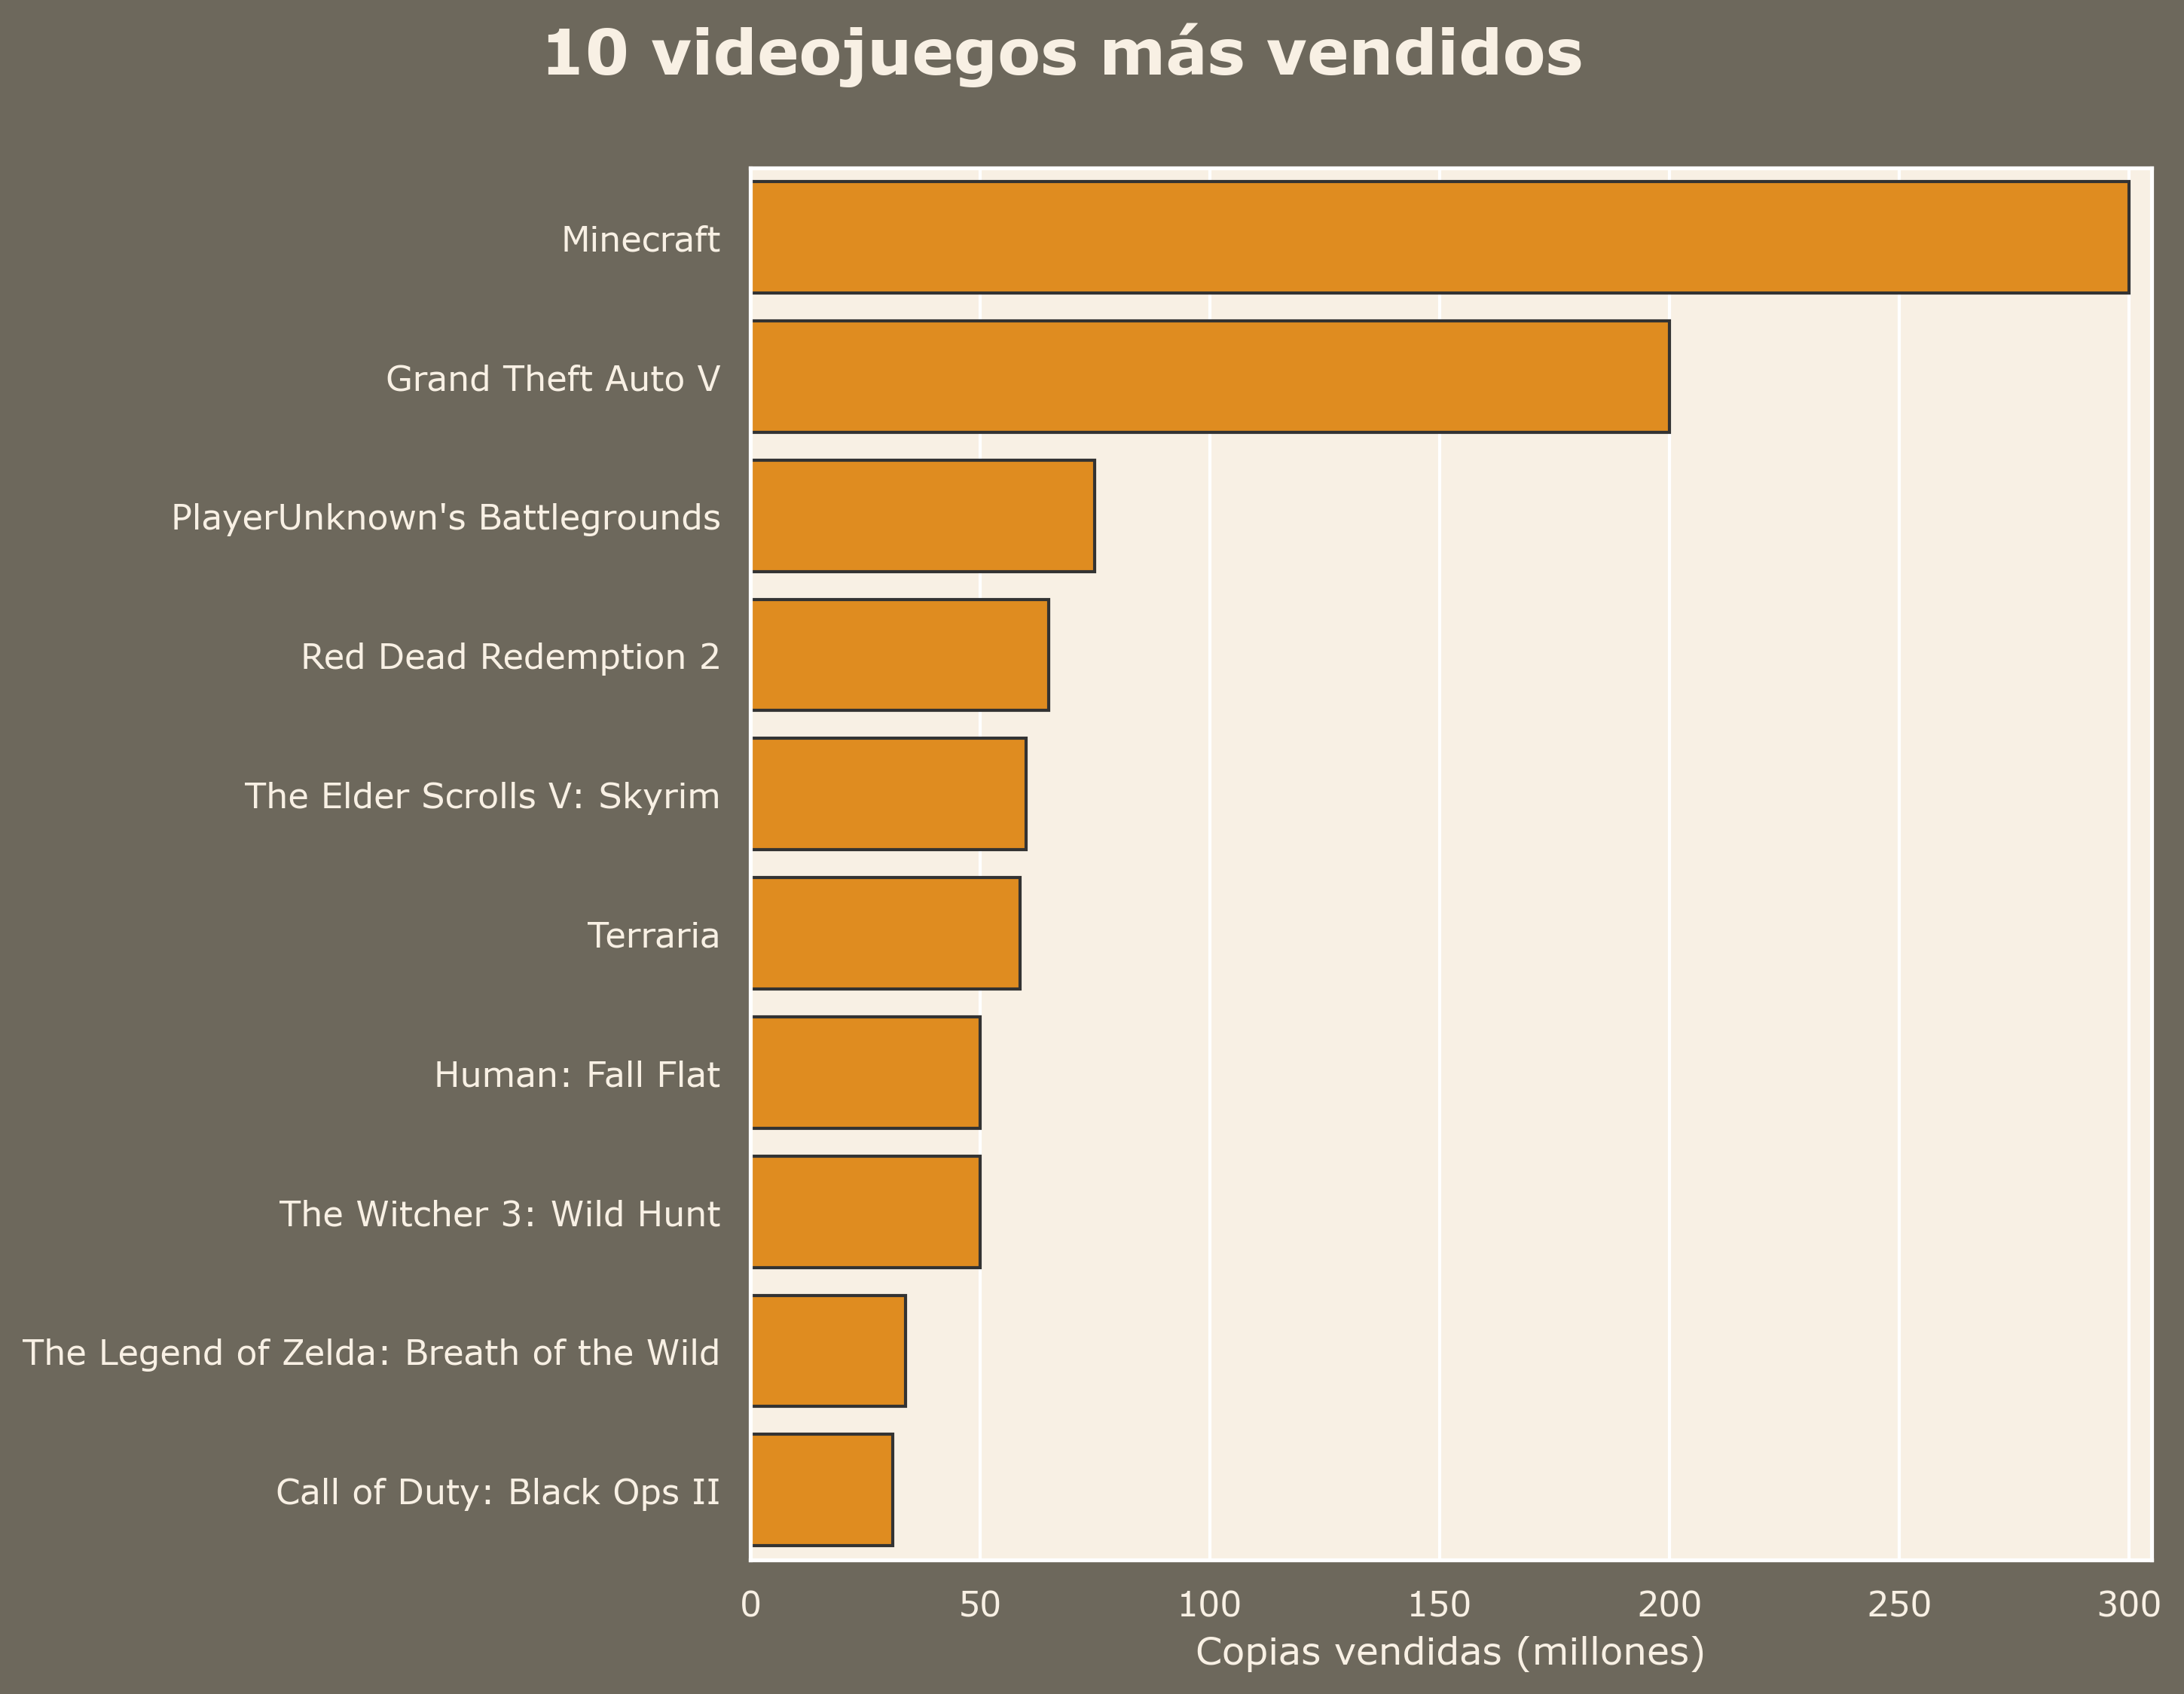

In [ ]:
# Top 10 videojuegos más vendidos
total_sales = games_filtered2.groupby(["title"])[["total_shipped"]].sum().sort_values(by="total_shipped", ascending=False).head(10)
fig = plt.figure(figsize=(8,8))

sns.barplot(x="total_shipped", y="title", data=total_sales, color="#FF9000", edgecolor=".20")
plt.setp(fig, linewidth=0)
plt.xlabel("Copias vendidas (millones)")
plt.ylabel("")
plt.title("10 videojuegos más vendidos", loc= "left", x= -0.15,fontsize= 20, weight="bold", pad=30)
plt.xlim(0,305)

## ¿Un videojuego exitoso en cuanto a critica representa el éxito en cuanto a ventas?


Entendemos que el exito de un juego depende para el tipo de publisher: Indie, AA y AAA

Vamos a coger solo los juegos que esten en venta, es decir que no sean Free to Play, y además, tengan una nota

In [6]:
games_steam_sell = games_steam[(games_steam["Price"] > 0) & games_steam["reviewScore"] > 0]
print(f"Existen en este df {games_steam_sell.shape[0]} juegos no F2P y con nota.") 
copies_reviews = games_steam_sell[["PublisherClass","reviewScore","copiesSold"]]

Existen en este df 1321 juegos no F2P y con nota.


Creamos un diagrama de dispersión que nos ayudará a ver si existe alguna correlación entre nota y ventas.

Text(0, 0.5, 'Puntuación')

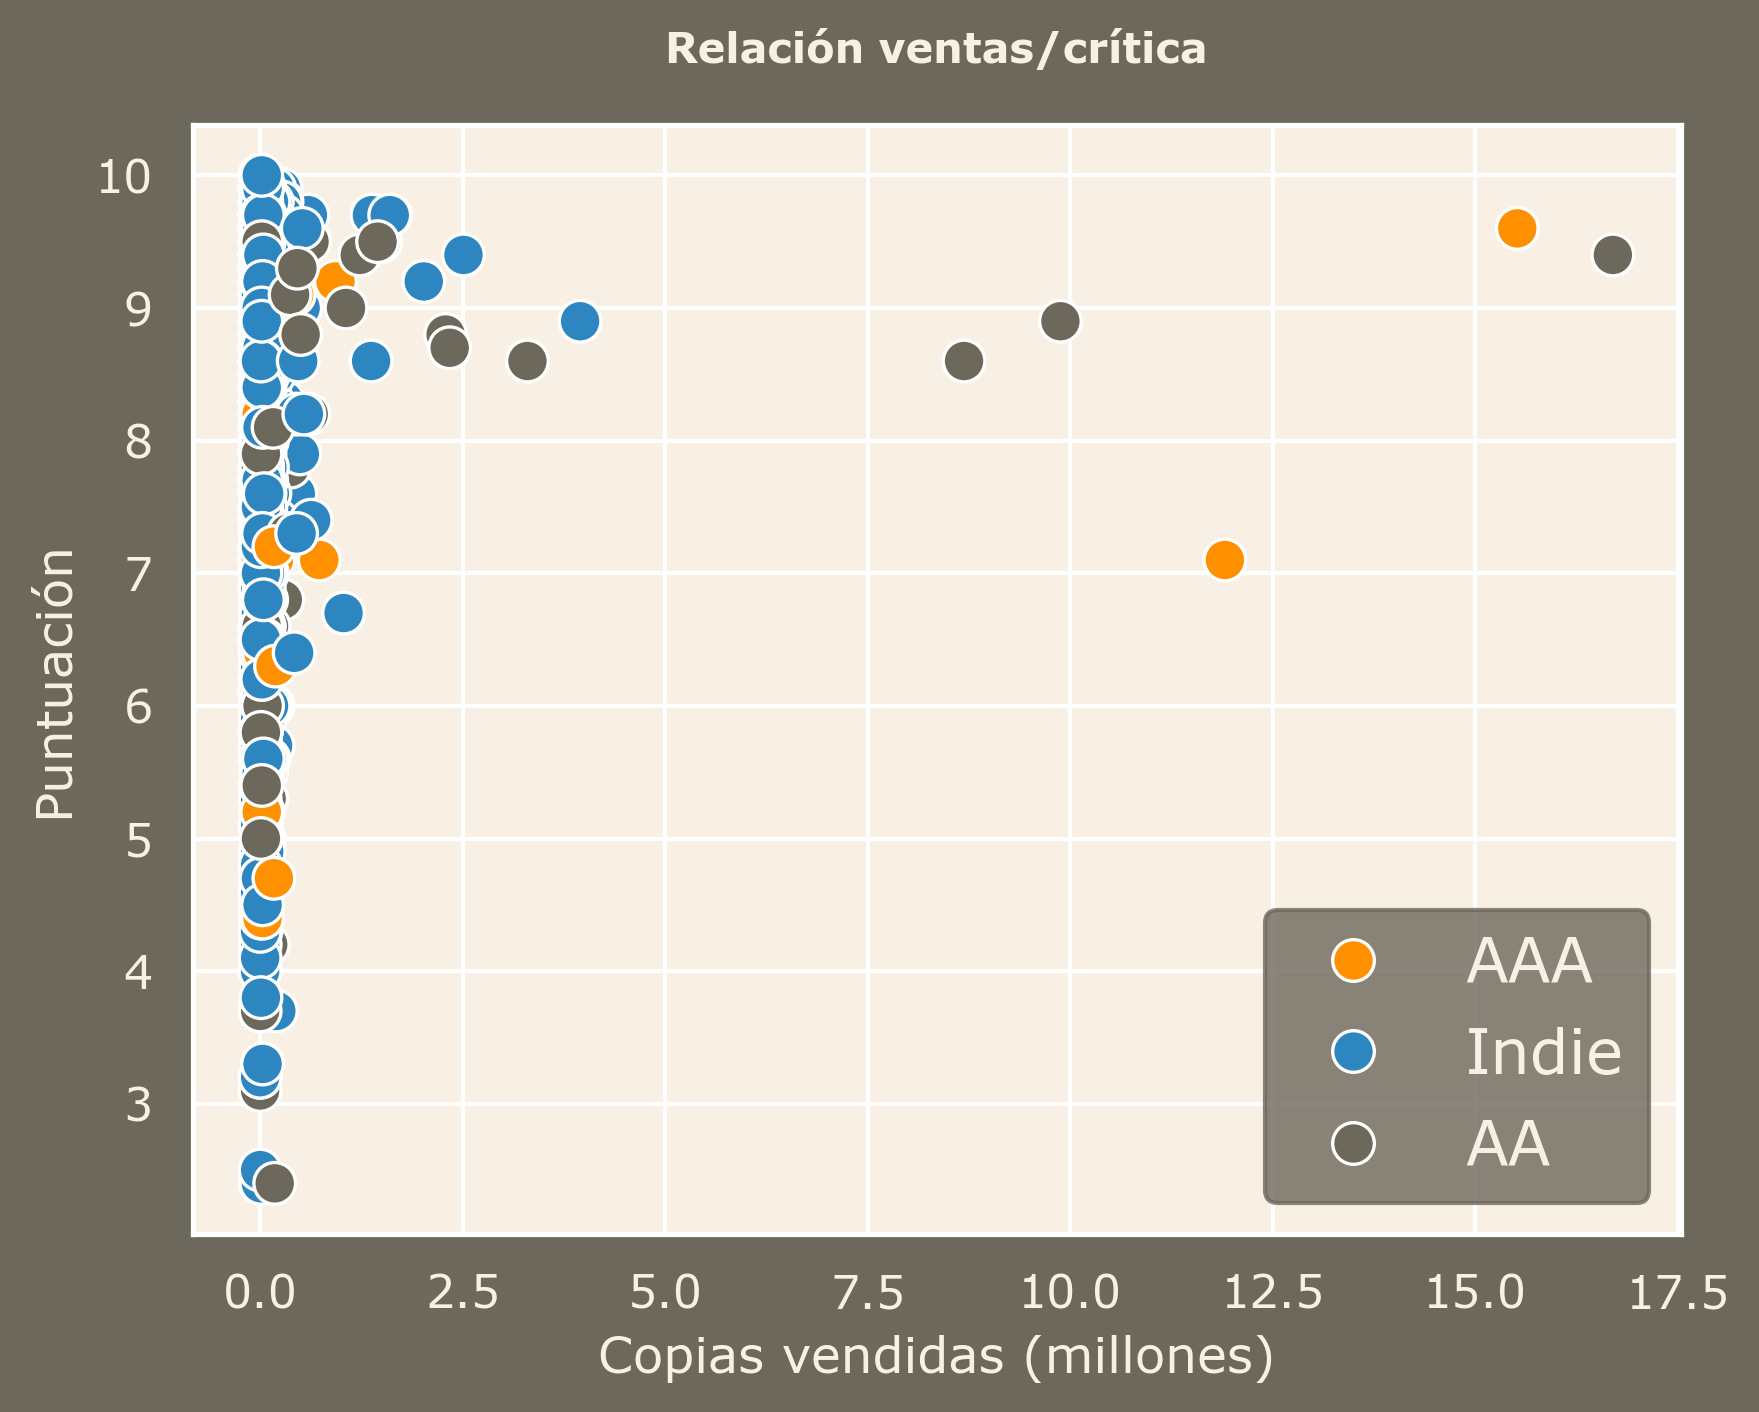

In [7]:
sns.scatterplot(data=copies_reviews, y="reviewScore", x="copiesSold", hue="PublisherClass", s=100,
                palette=["#FF9000", "#2E86C1", "#6D685C"])
plt.title("Relación ventas/crítica",fontsize= 10, weight="bold", pad=15)
plt.xlabel("Copias vendidas (millones)")
plt.legend(loc="lower right", frameon=True, fontsize=15).get_frame().set_color("#6D685C")
plt.ylabel("Puntuación")

Ahondemos más en esta gráfica: vamos a dividirla, por un lado donde se concentra la mayor parte de los datos, y otro donde se dispersan.

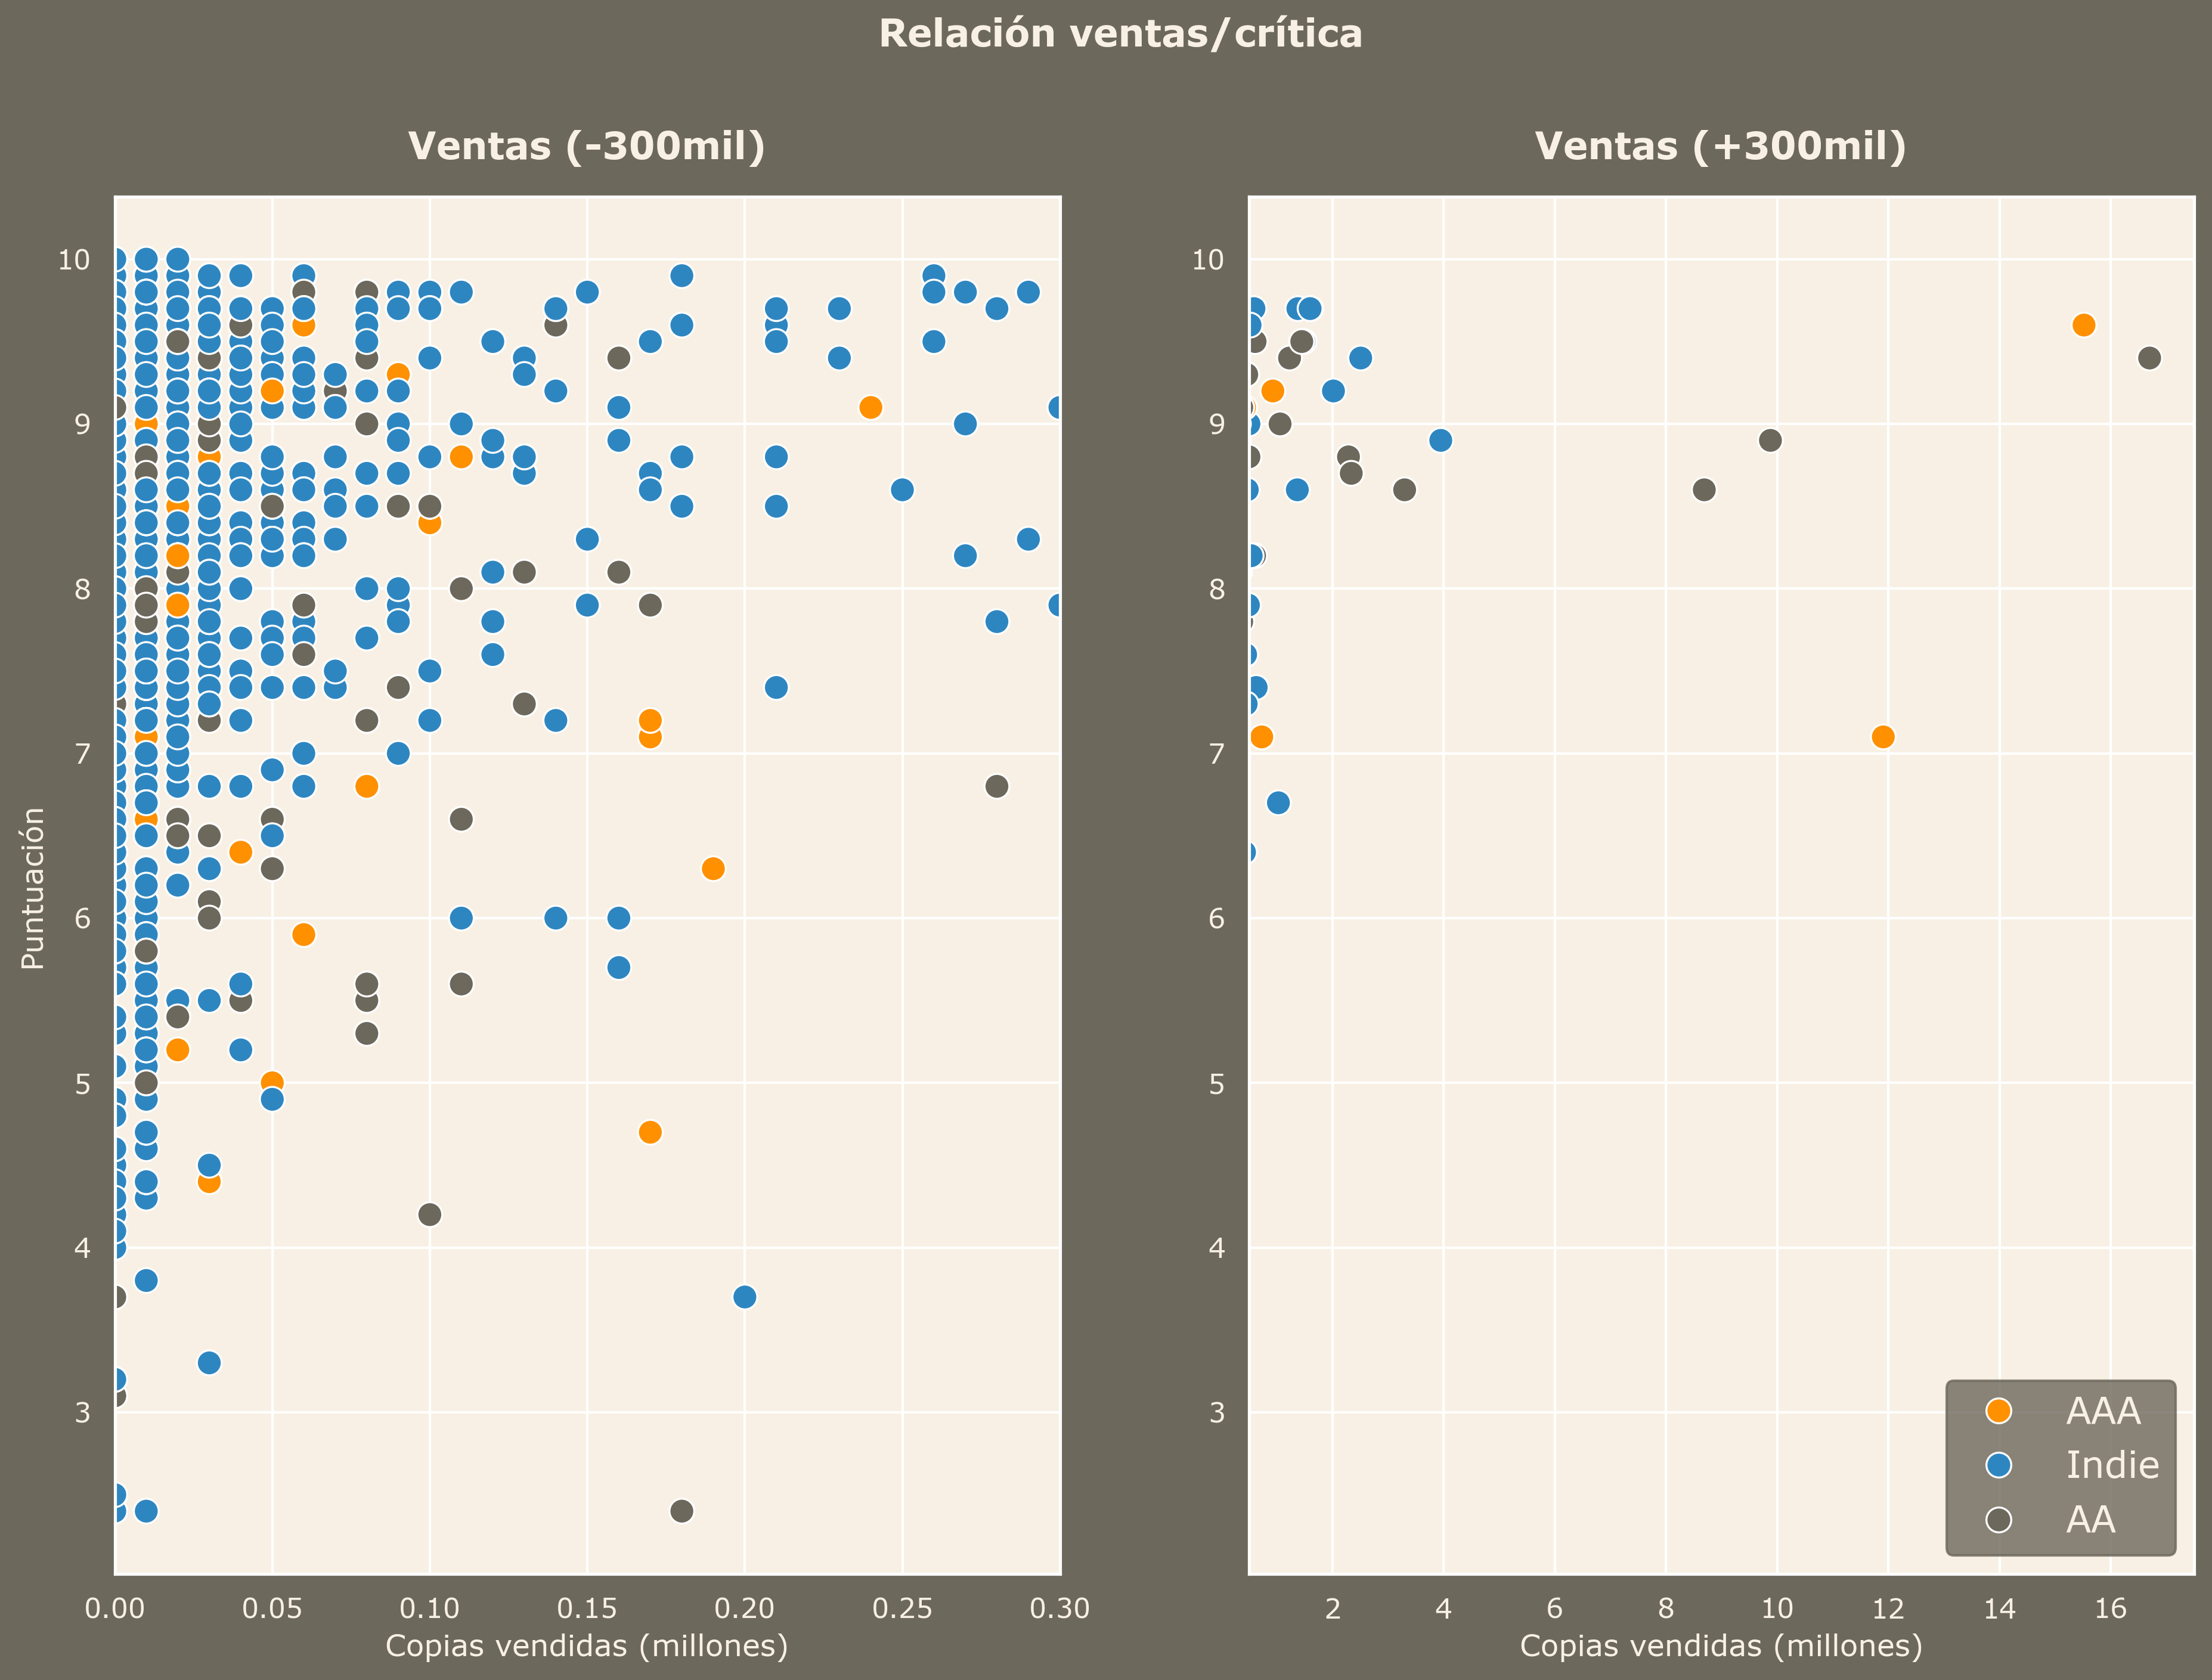

In [8]:
f, axes = plt.subplots(1, 2, figsize=(15,10))
plt.suptitle("Relación ventas/crítica",fontsize= 15, weight="bold")
sns.scatterplot(data=copies_reviews, y="reviewScore", x="copiesSold", hue="PublisherClass", s=100,
                palette=["#FF9000", "#2E86C1", "#6D685C"], ax=axes[0], legend=False)
axes[0].set_title("Ventas (-300mil)",fontsize= 15, weight="bold", pad=15)
axes[0].set_xlabel("Copias vendidas (millones)")
axes[0].set_ylabel("Puntuación")
axes[0].set_xlim(0,0.3)

sns.scatterplot(data=copies_reviews, y="reviewScore", x="copiesSold", hue="PublisherClass", s=100,
                palette=["#FF9000", "#2E86C1", "#6D685C"], ax=axes[1])
axes[1].set_title("Ventas (+300mil)",fontsize= 15, weight="bold", pad=15)
axes[1].set_xlabel("Copias vendidas (millones)")
axes[1].set_ylabel("")
axes[1].set_xlim(0.5,17.5)
axes[1].legend(loc="lower right", frameon=True, fontsize=15).get_frame().set_color("#6D685C")


Con esto obtenemos que realmente no existe una relación directa entre nota y copias vendidas, ya que un juego exitoso en ventas puede tener una nota buena o regular, así como un juego con buena nota puede no vender bien. Ahora, esto realmente tomará significado para cada tipo de estudio, si sus presupuestos son grandes o pequeños y cuantas ventas necesitan para recuperar la inversión.

## ¿Puede un juego independiente ser rentable? 

Aquí tomaremos en cuenta: copias vendidas, precio, nota, si el publisher en Indie y su categoria y género principal

In [95]:
#indie_games = games_steam[["copiesSold", "Price", "reviewScore", "PublisherClass", "Category_1", "Genre_1","Genre_2","Publishers", "releaseDate"]]
indie_games = games_steam
indie_games = indie_games[(indie_games["PublisherClass"] == "Indie") & (indie_games["Price"] > 0) & (indie_games["copiesSold"] > 0)]

In [96]:
indie_games.head(5)

,Name,releaseDate,copiesSold,Price,Revenue,avgPlaytime,reviewScore,PublisherClass,Publishers,Developers,AppID,Categories,Category_1,Category_2,Genres,Genre_1,Genre_2,month
1,EARTH DEFENSE FORCE 6,2024-07-25,0.16,59.99,7882151.0,29.651061,5.7,Indie,D3PUBLISHER,SANDLOT,2291060,"Single-player,Multi-player,Co-op,Online Co-op,...",Single-player,Multi-player,Action,Action,NaN,Julio
2,Sins of a Solar Empire II,2024-08-15,0.21,49.99,7815247.0,12.452593,8.8,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940,"Single-player,Multi-player,PvP,Online PvP,LAN ...",Single-player,Multi-player,"Simulation,Strategy",Simulation,Strategy,Agosto
3,Legend of Mortal,2024-06-14,0.44,19.99,7756399.0,24.797817,7.6,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910,"Single-player,Family Sharing",Single-player,Family Sharing,"Adventure,Indie,RPG,Strategy",Adventure,Indie,Junio
5,Soulmask,2024-05-30,0.30,29.99,7540563.0,95.697813,7.9,Indie,Qooland Games,CampFire Studio,2646460,"Single-player,Multi-player,PvP,Online PvP,LAN ...",Single-player,Multi-player,"Adventure,Indie,Massively Multiplayer,RPG,Simu...",Adventure,Indie,Mayo
6,The Universim,2024-01-22,0.33,29.99,7534369.0,16.868531,8.1,Indie,Crytivo,Crytivo,352720,"Single-player,Steam Achievements,Steam Trading...",Single-player,Steam Achievements,"Indie,Simulation,Strategy,Early Access",Indie,Simulation,Enero


Queremos reflejar la media de la nota de los juegos y sus ventas totales dependiendo de su precio de venta.

In [176]:
best_selling_by_price = indie_games.groupby(["Price",]).agg({'reviewScore': 'mean',
                                    'copiesSold': 'sum'}).sort_values(
                                    by="copiesSold", ascending=False).head(10).sort_values(by="Price", ascending=False)
best_selling_by_price

,reviewScore,copiesSold
Price,,
34.99,6.136364,1.74
29.99,7.360000,5.41
24.99,7.272464,4.92
19.99,7.606452,7.68
14.99,7.798901,5.21
12.99,7.432432,4.40
9.99,7.470192,4.74
6.99,7.829167,1.86
4.99,8.139623,5.82


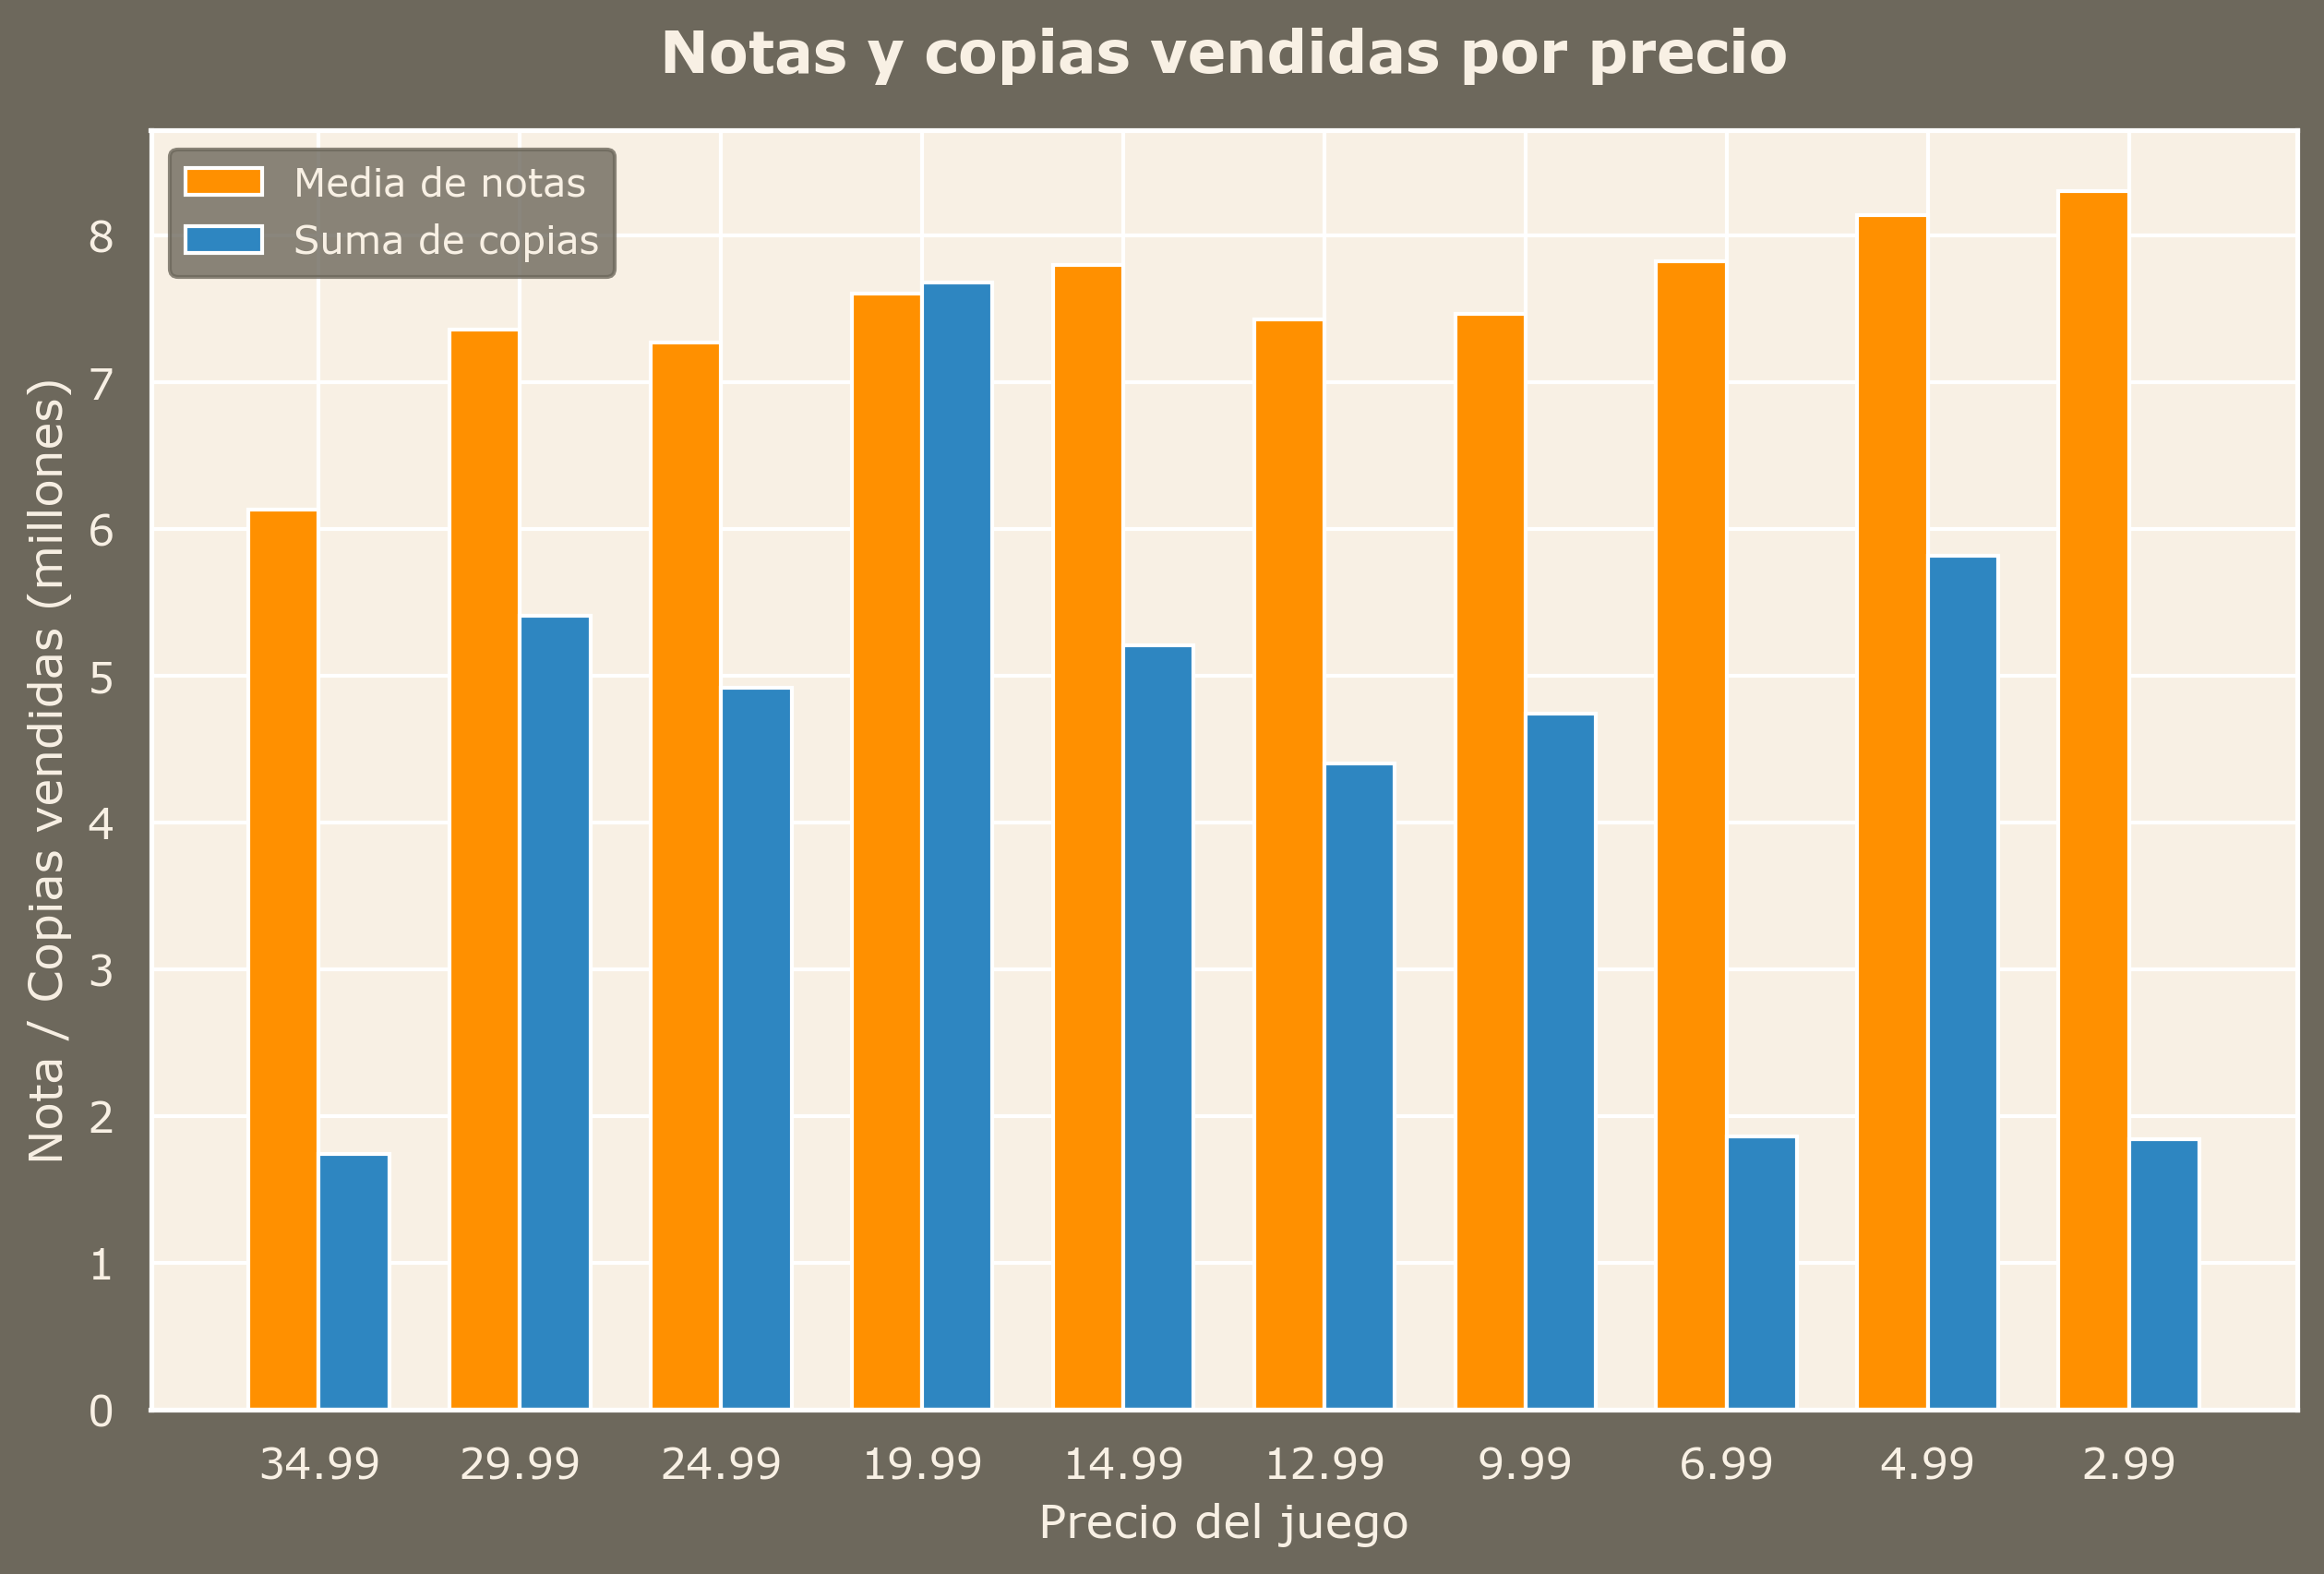

In [177]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(np.arange(len(best_selling_by_price)), best_selling_by_price['reviewScore'], width=0.35, label='Media de notas', color='#FF9000')
ax.bar(np.arange(len(best_selling_by_price)) + 0.35, best_selling_by_price['copiesSold'], width=0.35, label='Suma de copias', color='#2E86C1')

ax.set_xlabel('Precio del juego')
ax.set_ylabel('Nota / Copias vendidas (millones)')
ax.set_title('Notas y copias vendidas por precio', fontsize= 15, weight="bold", pad=15)
ax.set_xticks(np.arange(len(best_selling_by_price))+ 0.35 / 2)
ax.set_xticklabels(best_selling_by_price.index) 
plt.legend(loc="upper left", frameon=True, fontsize=10).get_frame().set_color("#6D685C")

Nos interesa ver que en esta gráfica de media los juegos con sus distintos precios gozan de buena nota, quizás menos para juegos más caros. Lo importante es puntualizar que los juegos independientes suelen vender más según menor sea su precio, caso más interesante para los juegos de 19.99 (7,5mill de copias) y 4.99 (5.8mill de copias) así que, sabiendo que los presupuestos de estos juegos van generalmente de $5k-$1m, podemos decir el rendimiento de estos juegos es positivo.

Usaremos el Genre_2 de los juegos al ser más variado y representar mejor los géneros de los títulos

In [149]:
indie_genres = indie_games[~indie_games["Genre_2"].isin(["Indie","Early Access"])]
indie_genres = indie_genres.groupby("Genre_2")["Name"].count().sort_values(ascending=False)
indie_genres

Genre_2
Adventure                156
Casual                   112
RPG                       79
Simulation                67
Strategy                  36
Racing                     4
Massively Multiplayer      2
Sports                     2
Free to Play               1
Name: Name, dtype: int64

Creamos un pie chart para poder visualizar mejor donde se concentran los porcentajes por género (Los 5 más comúnes)

Text(0.5, 1.0, 'Géneros más cómunes para juegos independientes')

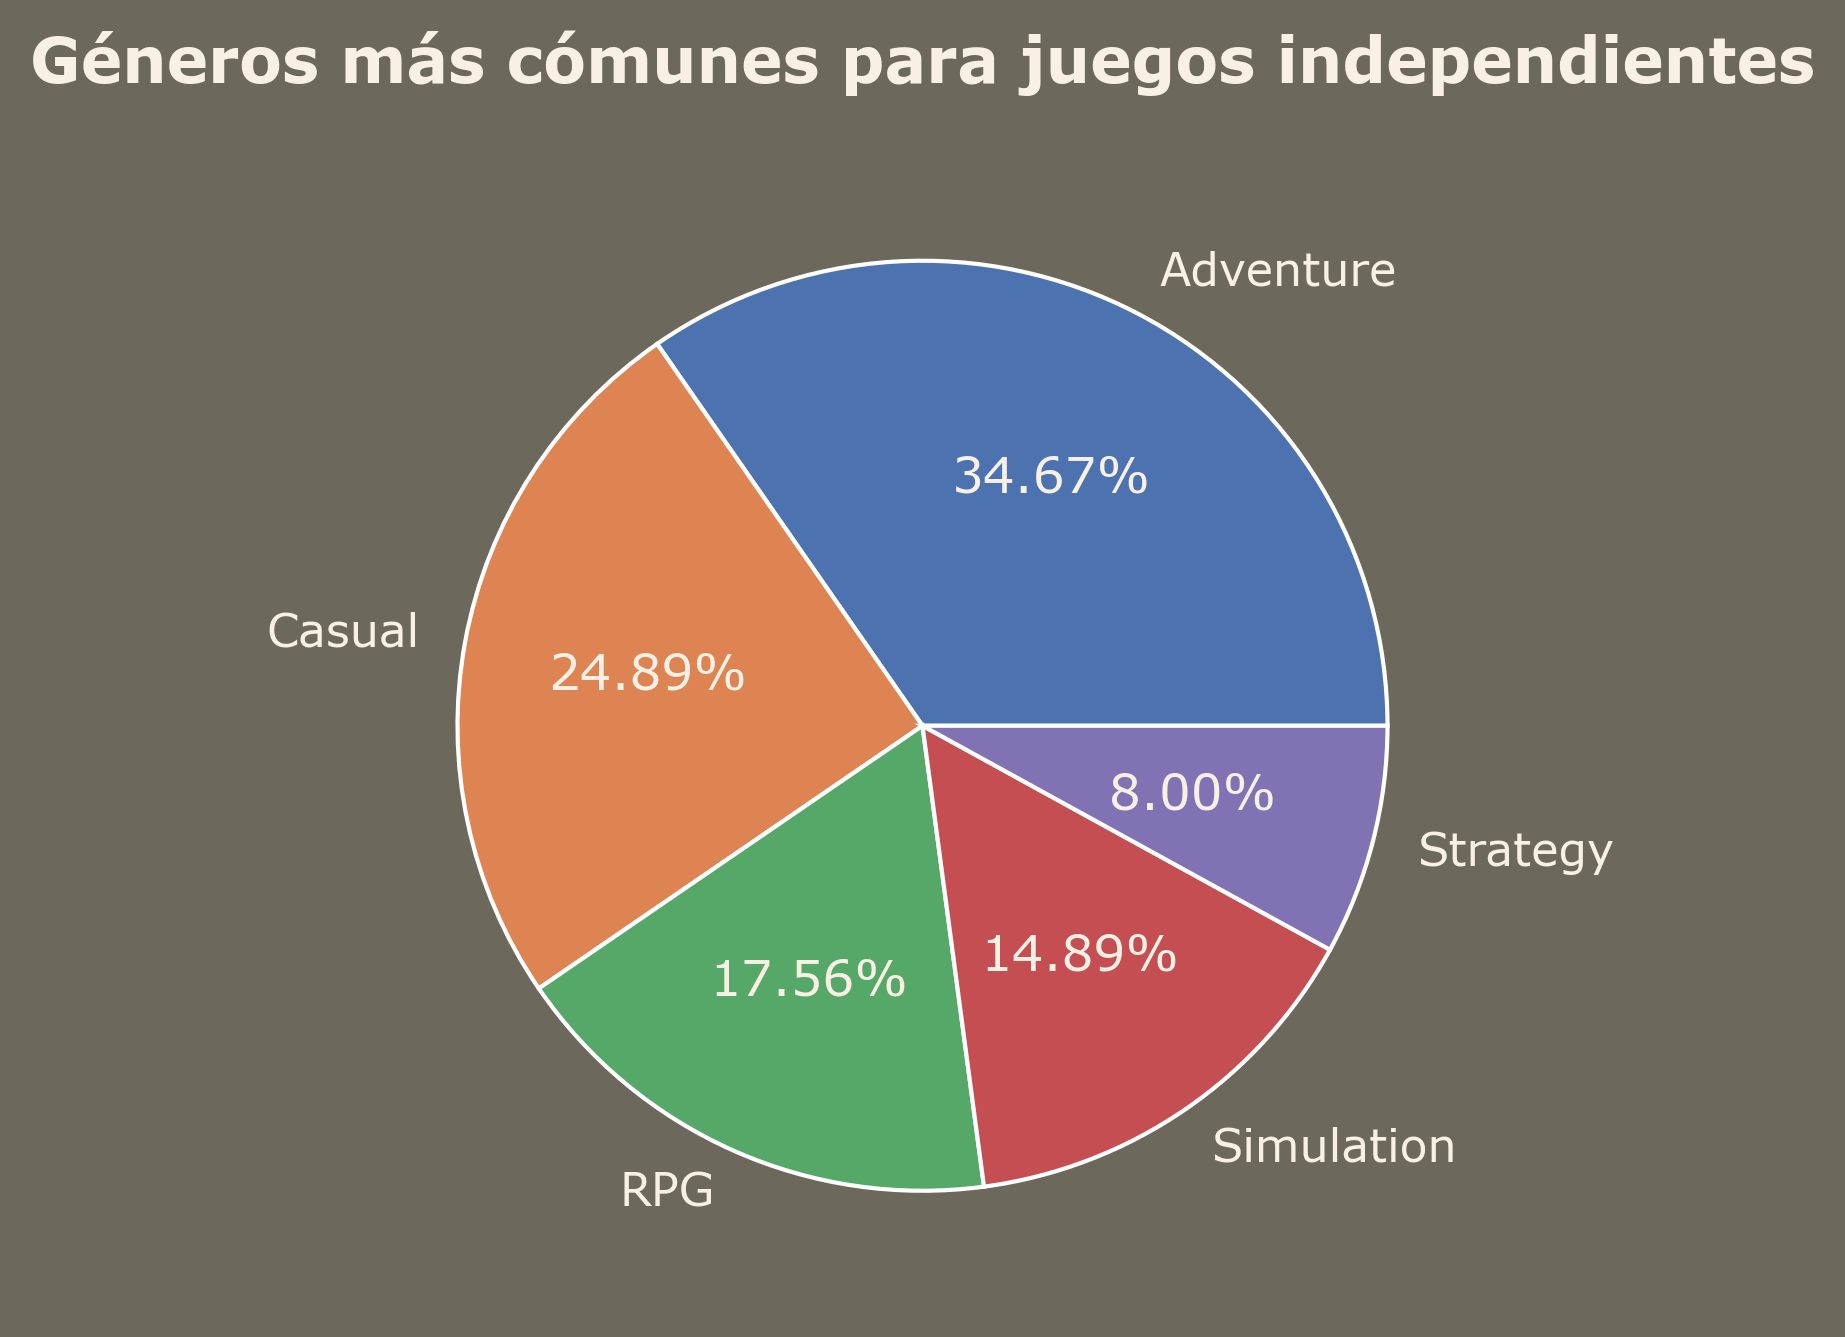

In [151]:
plt.figure(figsize=(5,6))
top_5_genres = indie_genres.nlargest(5)

plt.pie(top_5_genres.values,
        labels=top_5_genres.index,
        autopct='%1.2f%%');
plt.title("Géneros más cómunes para juegos independientes",fontsize= 15, weight="bold", pad=15)

Vemos que hay mucha concentración de juegos Casual, que son juegos para un público géneral, y de aventuras. Sin embargo, irnos a un género donde se concentren la mayor parte de los juegos puede no ser lo más apropiado teniendo en cuenta que hay mucha competencia en el mismo género y aunque desarrollemos un juego distinto y único, puede verse opacado por otros más populares del mismo género. Busquemos los más vendidos en el género de estrategia:

In [220]:
indie_genres = indie_games[~indie_games["Genre_2"].isin(["Indie","Early Access"])]
indie_genres = indie_genres[(indie_genres["Price"] >= 4.99) & (indie_genres["Price"] <= 19.99) & (indie_genres["reviewScore"] > 7)]
rpg_games = indie_genres[indie_genres["Genre_2"] == "Strategy"].sort_values("copiesSold", ascending=False).head(5)
rpg_games

,Name,releaseDate,copiesSold,Price,Revenue,avgPlaytime,reviewScore,PublisherClass,Publishers,Developers,AppID,Categories,Category_1,Category_2,Genres,Genre_1,Genre_2,month
1118,Rusty's Retirement,2024-04-26,0.28,6.99,1585093.0,36.764702,9.7,Indie,Mister Morris Games,Mister Morris Games,2666510,"Single-player,Steam Achievements,Steam Cloud,F...",Single-player,Steam Achievements,"Simulation,Strategy",Simulation,Strategy,Abril
32,Kingdom Rush 5: Alliance TD,2024-07-25,0.25,19.99,4042356.0,9.090087,8.6,Indie,Ironhide Game Studio,Ironhide Game Studio,2849080,"Single-player,Steam Achievements,Partial Contr...",Single-player,Steam Achievements,"Indie,Strategy",Indie,Strategy,Julio
1162,KeeperRL,2024-02-29,0.09,19.99,1168042.0,18.708578,8.7,Indie,Electric Succubi,Electric Succubi,329970,"Single-player,Steam Workshop,Steam Cloud",Single-player,Steam Workshop,"RPG,Strategy,Early Access",RPG,Strategy,Febrero
1176,Emberward,2024-06-25,0.08,14.99,1042636.0,9.537951,9.6,Indie,ReficGames,ReficGames,2459550,"Single-player,Steam Cloud,Family Sharing",Single-player,Steam Cloud,"Indie,Strategy,Early Access",Indie,Strategy,Junio
1328,Guardians of Eden-Embrace of the Forest,2024-03-07,0.05,10.99,440759.0,3.410280,9.3,Indie,"Mango Party,Mango Party News",Black Cat Entertainment,2672430,"Single-player,Steam Achievements,Steam Cloud,F...",Single-player,Steam Achievements,"Casual,Strategy",Casual,Strategy,Marzo


Finalmente, ¡Fijemonos en los estudios que hacen estos juegos!

In [208]:
rpg_games["Game and Dev"] = rpg_games["Name"] + "\n" + " (" + rpg_games["Developers"] + ")"

(0.0, 0.3)

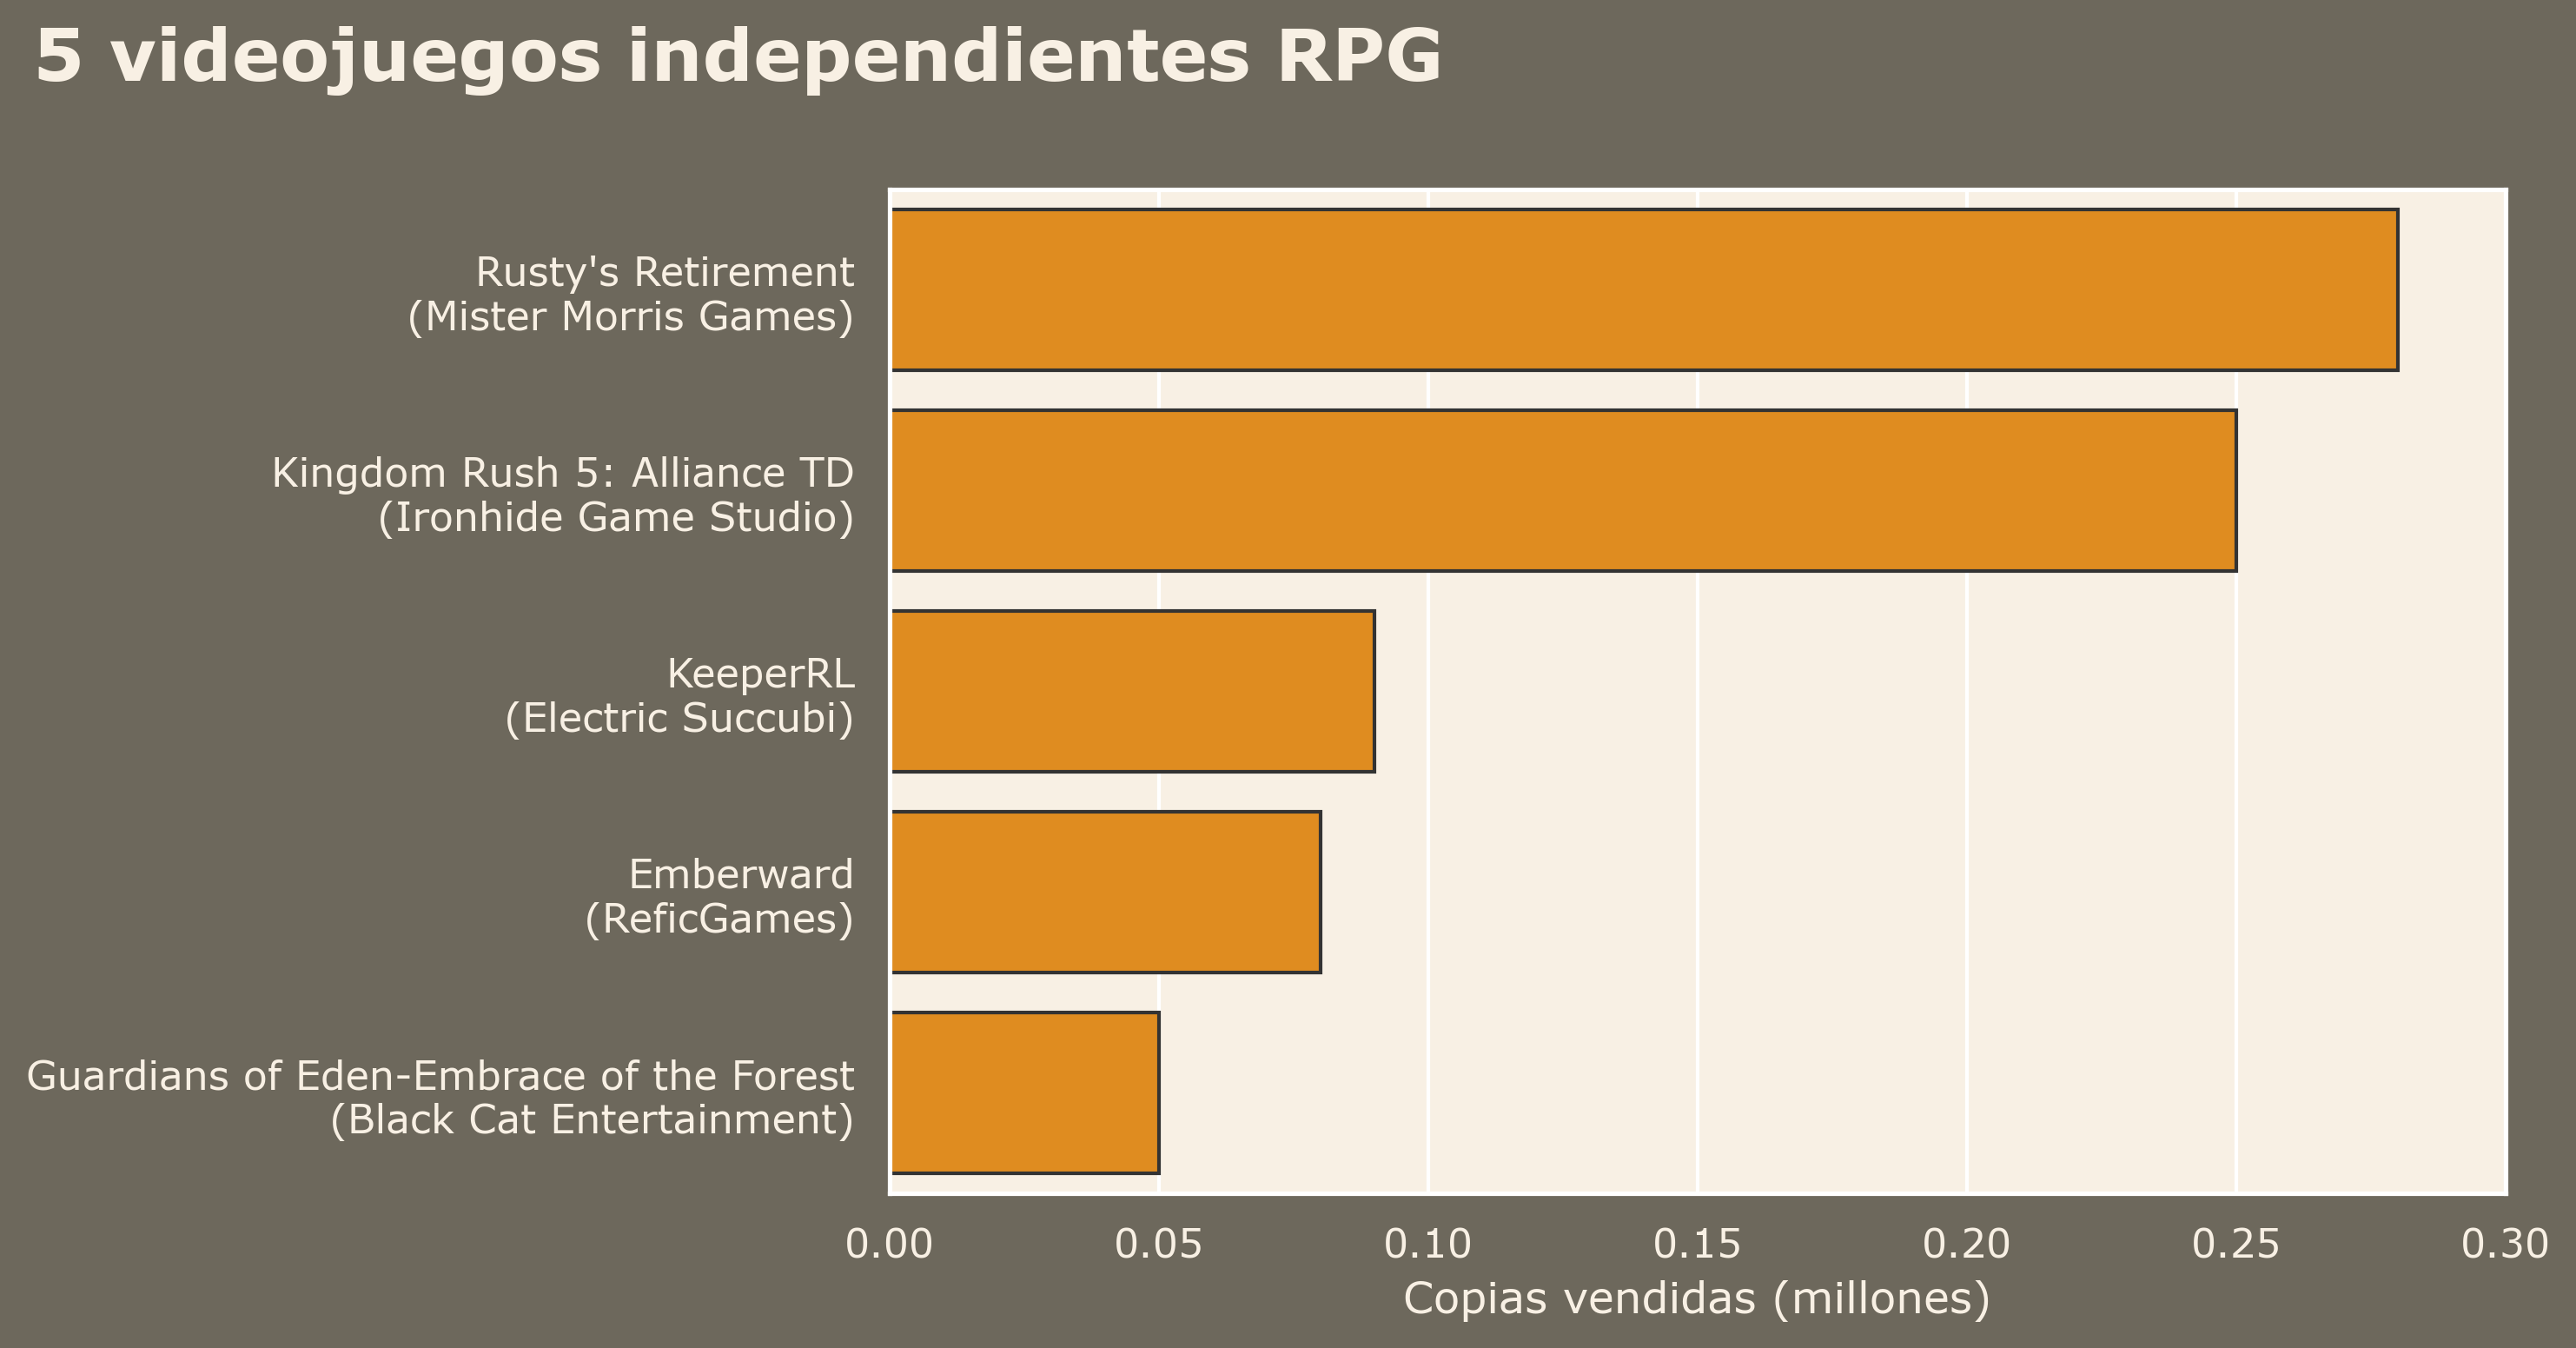

In [219]:
fig = plt.figure(figsize=(8,5))

sns.barplot(y="Game and Dev", x="copiesSold", data=rpg_games, color="#FF9000", edgecolor=".20")
plt.setp(fig, linewidth=0)
plt.xlabel("Copias vendidas (millones)")
plt.ylabel("")
plt.title("5 videojuegos independientes RPG", loc= "left", x= -0.53,fontsize= 20, weight="bold", pad=30)
plt.xlim(0,0.3)

Vemos que 4 de estos 5 juegos apuntan a un nicho del género de estrategia, el tower defense. No tienen presupuestos muy elevados y gozan de buenas ventas, por lo cual pueden ser buenas oportunidades para entrar en el mercado de los videojuegos: además de diversificar nuestros ingresos, podríamos adquirir estos estudios que apuntan a este tipo de jugadores o financiar sus proyectos esperando un porcentaje de retorno por cada venta, como si hiciesemos de publishers (aunque ya estas pueden dar más herramientas a los estudios)